## Tutorial Numpy

Hit `shift+enter` in each cell to execute the Python code therein.

Line 1 imports Numpy as np, which is the recommended
convention. The next version shows numpy version. For instance, mine is `1.18.5`

In [1]:
import numpy as np # recommended convention
np.__version__

'1.18.5'

The next line creates an array of 32 bit floating point
numbers.  The `itemize` property shows the number of bytes
per item.

In [3]:
x = np.array([1, 1, 1], dtype=np.float32)
print(x)

[1. 1. 1.]


In [4]:
print(x.itemsize) # number of bytes per item

4


This computes the sine of the input array of all ones, using Numpy's unary function, `np.sin`. There
is another sine function in the built-in math module, but the Numpy version
is faster because it does not require explicit
looping (i.e. using a `for` loop)  over each of the elements in
the array. That looping happens in `np.sin` function itself.

In [6]:
print(np.sin(np.array([1, 1, 1], dtype=np.float32)))

[0.84147096 0.84147096 0.84147096]


Numpy arrays can have different shapes and number
of dimensions.

In [8]:
x = np.array([[1,2,3], [4,5,6]])
print(x.shape)

(2, 3)


Numpy slicing rules extend Python's natural slicing syntax. Note the colon `:` character selects all elements in the corresponding row or column.


In [9]:
x=np.array([ [1,2,3],[4,5,6] ])
print(x[:,0]) # 0th column

[1 4]


In [10]:
print(x[:,1]) # 1st column

[2 5]


In [11]:
print(x[0,:]) # 0th row

[1 2 3]


In [12]:
print(x[1,:]) # 1st row

[4 5 6]


Numpy slicing can select sections
of an array as shown. 

In [13]:
x = np.array([[1,2,3], [4,5,6]])
print(x)

[[1 2 3]
 [4 5 6]]


In [14]:
print(x[:,1:]) # all rows, 1st thru last column

[[2 3]
 [5 6]]


In [15]:
print(x[:,::2]) # all rows, every other column

[[1 3]
 [4 6]]


In contrast with MATLAB, Numpy uses pass-by-reference semantics so it creates *views* into the existing array, without implicit copying. This is particularly helpful with very large arrays because copying can be slow.

In [16]:
x = np.ones((3,3))
print(x)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [17]:
print(x[:,[0,1,2,2]]) # notice duplicated last dimension

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [18]:
y = x[:,[0,1,2,2]] # same as above, but assign it

In [19]:
x[0,0] = 999     # change element in x
print(x)         # changed 

[[999.   1.   1.]
 [  1.   1.   1.]
 [  1.   1.   1.]]


Because we made a **copy**, changing the individual elements of x does **not** affect y.  

In [20]:
print(y)                         # not changed!

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [21]:
x = np.ones((3,3))
y = x[:2,:2] # upper left piece
x[0,0] = 999 # change value
print(x) 

[[999.   1.   1.]
 [  1.   1.   1.]
 [  1.   1.   1.]]


As a consequence of the pass-by-reference semantics, Numpy views point at the same memory as their parents, so changing an element in x updates the corresponding element in y. This is because a view is just a window into the same memory.  

In [22]:
print(y)

[[999.   1.]
 [  1.   1.]]


Indexing can also create copies as we saw before. y is a copy, not a view, because it was created using indexing whereas z was created using slicing.  Thus, even though y and z have the same entries, only z is affected by changes to x.

In [23]:
x = np.arange(5) # create array
print(x)
y = x[[0,1,2]] # index by integer list
print(y)

[0 1 2 3 4]
[0 1 2]


In [24]:
z = x[:3]      # slice
print(z)      # note y and z have same entries?
x[0] = 999     # change element of x
print(x)

[0 1 2]
[999   1   2   3   4]


In [25]:
print(y)            # note y is unaffected,

[0 1 2]


In [26]:
print(z)            # but z is (it's a view).

[999   1   2]


Numpy arrays have a built-in flags.owndata property that can help keep track of views until you get the hang of them. 

In [27]:
print(x.flags.owndata)

True


In [28]:
print(y.flags.owndata)

True


In [29]:
print(z.flags.owndata)   # as a view, z does not own the data!

False


Numpy arrays support elementwise multiplication, not
row-column multiplication. You can use Numpy array for this kind
with `@` sign for multiplication.

In [30]:
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
x = np.array([[1],[0],[0]])
print(A@x)        # perkalian matrix

[[1]
 [4]
 [7]]


In [31]:
A = np.ones((3,3))
print(type(A))    # array not matrix
x = np.ones((3,1)) # array not matrix
print(A*x)        # not row-column multiplication!

<class 'numpy.ndarray'>
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


## Numpy Broadcasting

In [34]:
X, Y = np.meshgrid(np.arange(2), np.arange(2)) # meshgrid creates 2-dimensional grids
print(X)

[[0 1]
 [0 1]]


In [35]:
print(Y)

[[0 0]
 [1 1]]


Because the two arrays have compatible shapes, they can be
added together element-wise.

In [36]:
print(X+Y)

[[0 1]
 [1 2]]


In [37]:
x = np.array([0, 1])
y = np.array([0, 1])
print(x)

[0 1]


In [38]:
print(y)

[0 1]


Using Numpy broadcasting, we can skip creating compatible arrays using meshgrid and instead accomplish the same thing automatically by using the None singleton to inject an  additional compatible dimension.

In [39]:
print(x + y[:,None]) # add broadcast dimension

[[0 1]
 [1 2]]


In [40]:
print(X+Y)

[[0 1]
 [1 2]]


In [42]:
x = np.array([0, 1])
y = np.array([0, 1, 2])
X, Y = np.meshgrid(x, y)
print(X)

[[0 1]
 [0 1]
 [0 1]]


In [43]:
print(Y)

[[0 0]
 [1 1]
 [2 2]]


In [44]:
print(X+Y)

[[0 1]
 [1 2]
 [2 3]]


In [46]:
print(x+y[:, None]) # same as w/ meshgrid

[[0 1]
 [1 2]
 [2 3]]


In this example, the array shapes are different, so the addition of x and y is not possible without Numpy broadcasting. The last line shows that broadcasting generates the same output as using the compatible array generated by meshgrid.

Numpy broadcasting also works in multiple dimensions. We start here with three one-dimensional arrays and create a three-dimensional output using broadcasting. The `x+y[:None]` part creates a conforming two-dimensional array as before, and due to the left-to-right evaluation order, this two-dimensional intermediate product is broadcast against the z variable, whose two None dimensions create an output three-dimensional array.

In [47]:
x = np.array([0, 1])
y = np.array([0, 1, 2])
z = np.array([0, 1, 2, 3])
print(x+y[:, None]+z[:, None, None])

[[[0 1]
  [1 2]
  [2 3]]

 [[1 2]
  [2 3]
  [3 4]]

 [[2 3]
  [3 4]
  [4 5]]

 [[3 4]
  [4 5]
  [5 6]]]


## Matplotlib

The first line imports the Matplotlib module
following the recommended naming convention. The
next plots a range of numbers. The last line actually
forces the plot to render. This is not necessary in the IPython Notebook.

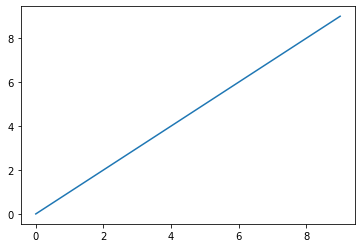

In [48]:
import matplotlib.pyplot as plt
plt.plot(range(10))
#plt.show() 

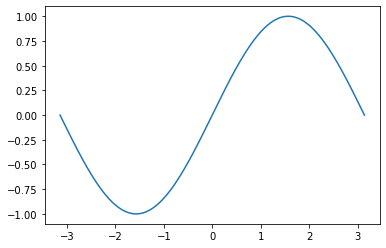

In [49]:
z = np.linspace(-np.pi, np.pi, 201)      # create 201 points between -pi to pi
plt.plot(z, np.sin(z))